<a href="https://colab.research.google.com/github/HiyaJain22/ML-Lab/blob/main/Lab2/Expt2_ML_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
d=pd.read_csv("/content/Iris(1).csv")
d.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
x=d[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=d['Species']

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [ ]:

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=200)
classifier.fit(x_train,y_train)



DecisionTreeClassifier(criterion='entropy', random_state=200)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
result=pd.DataFrame()
result["actual_y"]=y_test
result['predicted_y']=y_pred
print(result.sample(5))

            actual_y      predicted_y
134   Iris-virginica   Iris-virginica
74   Iris-versicolor  Iris-versicolor
80   Iris-versicolor  Iris-versicolor
68   Iris-versicolor  Iris-versicolor
50   Iris-versicolor  Iris-versicolor


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
from sklearn import metrics
score = metrics.accuracy_score(y_pred,y_test)
print(score)

0.9666666666666667


In [ ]:
from sklearn import metrics

#create confusion matrix
c_matrix = metrics.confusion_matrix(y_test, y_pred)

#print confusion matrix
print(c_matrix)

[[10  0  0]
 [ 0 12  0]
 [ 0  1  7]]


In [ ]:
from sklearn import metrics

classification_report = metrics.classification_report(y_pred,y_test)
print(classification_report)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



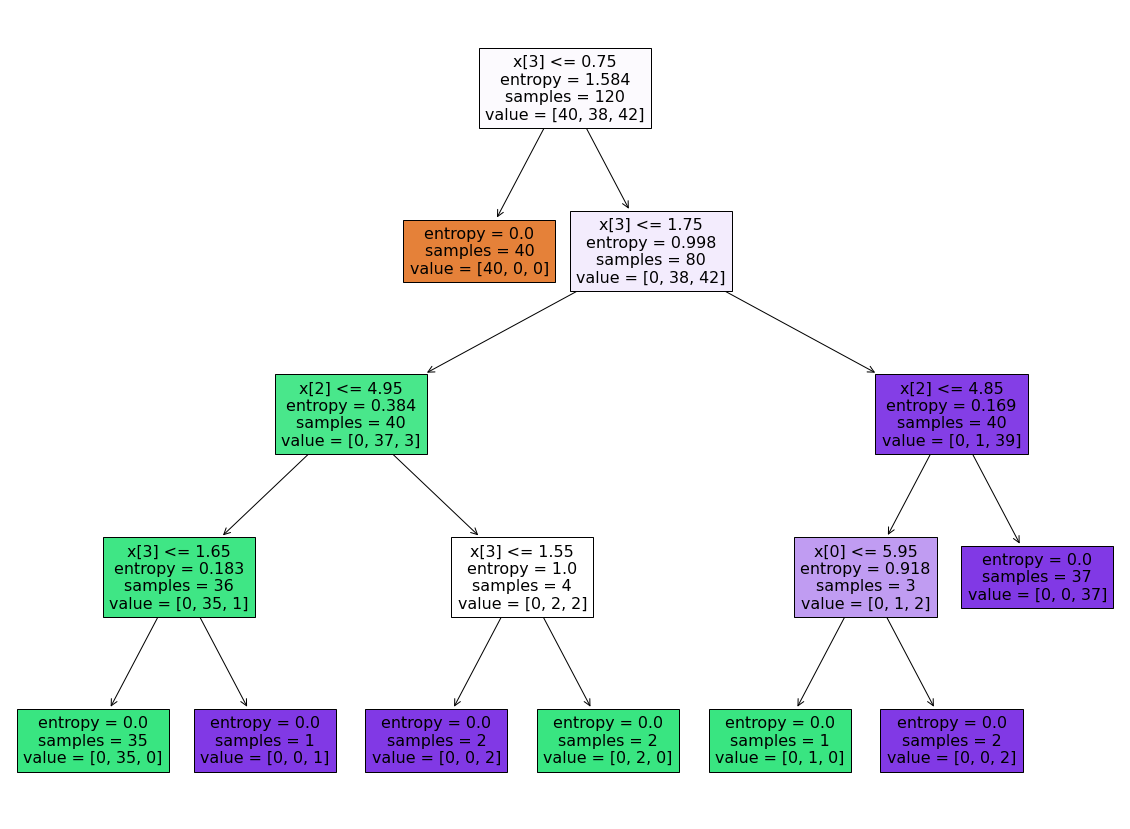

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(classifier,filled=True)
plt.show()

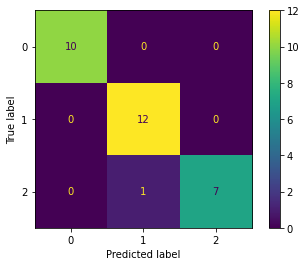

In [ ]:

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

In [ ]:
#Predict the response for train dataset
y_pred_train = classifier.predict(x_train)

In [ ]:

from sklearn import metrics

score = metrics.accuracy_score(y_pred_train,y_train)
print(score)

1.0


In [ ]:
from sklearn import metrics

c_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)

print(c_matrix_train)
     

[[40  0  0]
 [ 0 38  0]
 [ 0  0 42]]


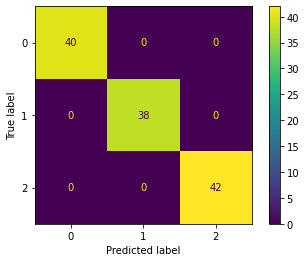

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_train)
disp.plot()

In [ ]:
from sklearn import metrics

score = metrics.accuracy_score(y_pred_train,y_train)
print(score)

1.0


In [ ]:
n=int(input("Enter max depth value:"))

Enter max depth value:99


In [ ]:
maxdepth=[]
for i in range(1,n+1):
  maxdepth.append(i)



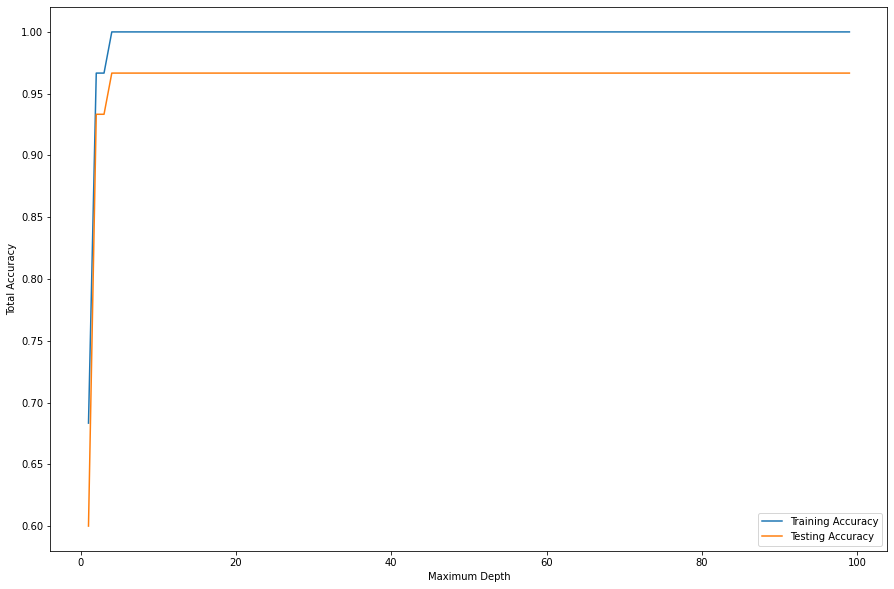

In [ ]:
train=[]
test=[]
for x in maxdepth:
  dtc =DecisionTreeClassifier(max_depth=x,random_state=101)
  dtc.fit(x_train,y_train)

  y_train_pred = dtc.predict(x_train)
  train_z_prob = dtc.predict_proba(x_train)[:,1]

  y_test_pred = dtc.predict(x_test)
  test_z_prob = dtc.predict_proba(x_test)[:,1]

  train.append(accuracy_score(y_train, y_train_pred))
  test.append(accuracy_score(y_test, y_test_pred))

fig = plt.figure(figsize=(15,10))
x = np.arange(len(maxdepth)) + 1 
plt.plot(x, train, label='Training Accuracy') 
plt.plot(x, test, label='Testing Accuracy') 
plt.xlabel('Maximum Depth')
plt.ylabel('Total Accuracy') 
plt.legend() 
plt.show() 

# Decision Tree 2.3



In [ ]:
df=pd.read_csv("/content/Breast_cancer_data (1).csv")
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
print(df.columns)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')


In [ ]:
x=df[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area','mean_smoothness']]
y=df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=101)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=101)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
score = metrics.accuracy_score(y_pred,y_test)
print(score)

0.8947368421052632


In [ ]:
from sklearn import metrics

#create confusion matrix
c_matrix = metrics.confusion_matrix(y_test, y_pred)

#print confusion matrix
print(c_matrix)

[[40  5]
 [ 7 62]]


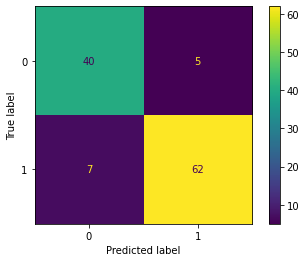

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix)
disp.plot()

In [ ]:
#Predict the response for train dataset
y_pred_train = classifier.predict(x_train)

In [ ]:
from sklearn import metrics

c_matrix_train = metrics.confusion_matrix(y_train, y_pred_train)

print(c_matrix_train)

[[167   0]
 [  0 288]]


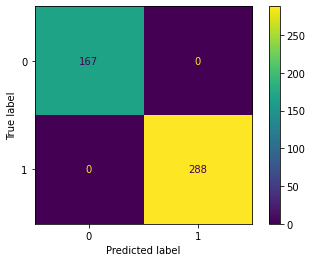

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_train)
disp.plot()

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
classification_report = metrics.classification_report(y_pred,y_test)
print(classification_report)

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        47
           1       0.90      0.93      0.91        67

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



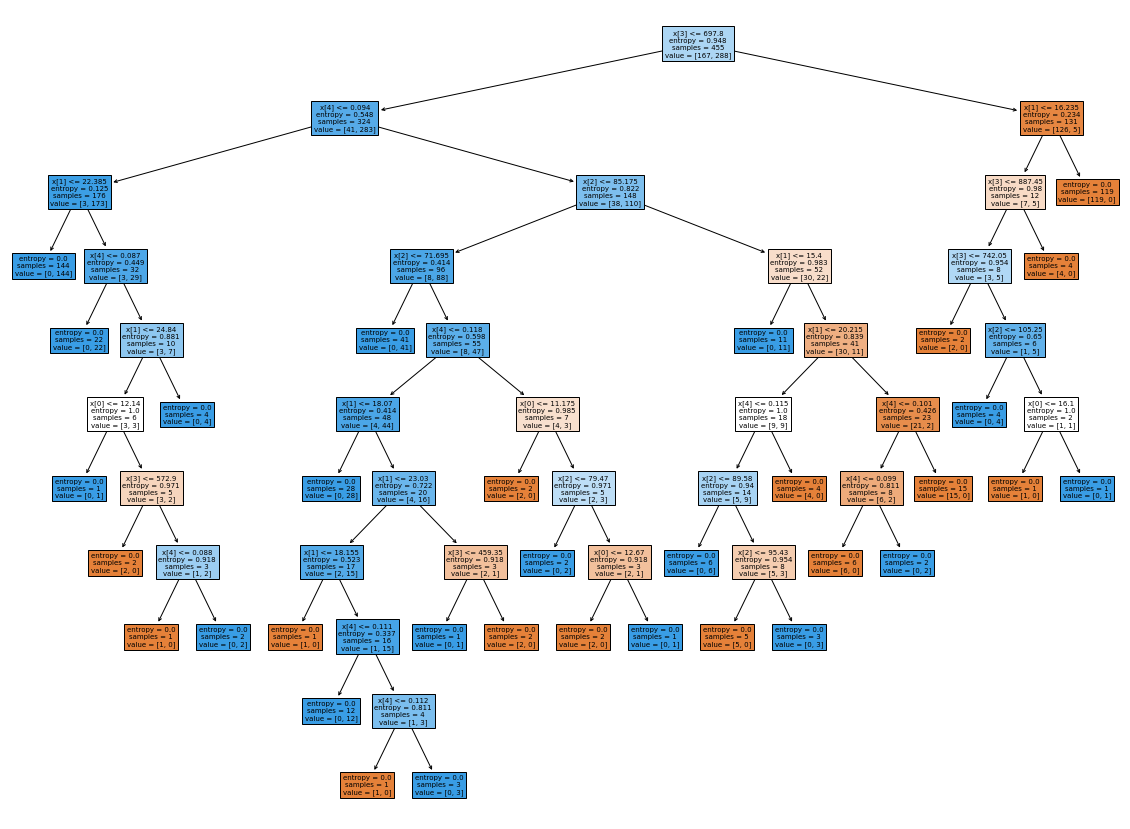

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(classifier,filled=True)
plt.show()

In [ ]:
n=int(input("Enter max depth value:"))

Enter max depth value:10


In [ ]:
maxdepth=[]
for i in range(1,n+1):
  maxdepth.append(i)



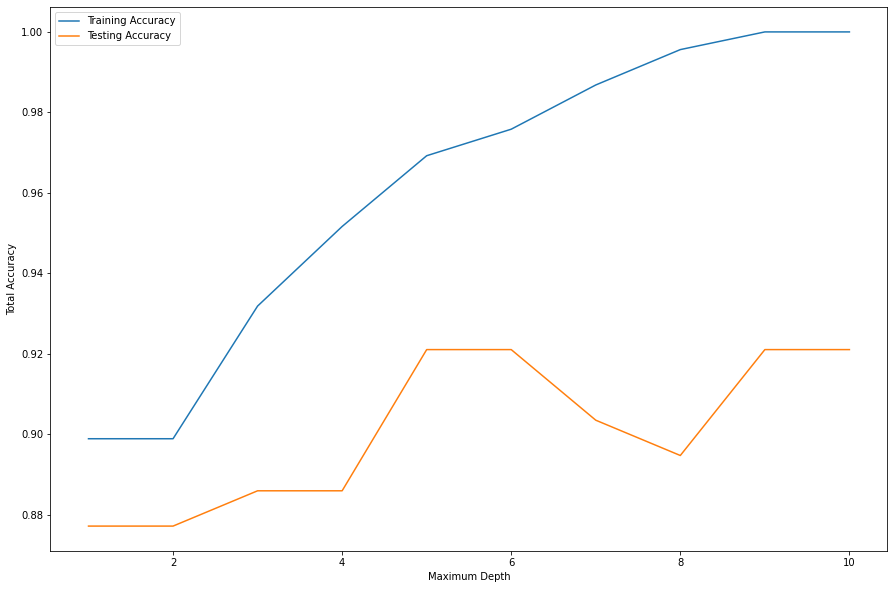

In [ ]:
train=[]
test=[]
for x in maxdepth:
  dtc =DecisionTreeClassifier(max_depth=x,random_state=101)
  dtc.fit(x_train,y_train)

  y_train_pred = dtc.predict(x_train)
  train_z_prob = dtc.predict_proba(x_train)[:,1]

  y_test_pred = dtc.predict(x_test)
  test_z_prob = dtc.predict_proba(x_test)[:,1]

  train.append(accuracy_score(y_train, y_train_pred))
  test.append(accuracy_score(y_test, y_test_pred))

fig = plt.figure(figsize=(15,10))
x = np.arange(len(maxdepth)) + 1 
plt.plot(x, train, label='Training Accuracy')
plt.plot(x, test, label='Testing Accuracy')
plt.xlabel('Maximum Depth') 
plt.ylabel('Total Accuracy')
plt.legend() 
plt.show()